# Simple Classifier

In [1]:
import os, sys, imp
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.inspection import DecisionBoundaryDisplay

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
import datasets as D
imp.reload(D)

/var/folders/b9/jjp98g8j2mbcn65j0fgl0dzw0000gp/T/ipykernel_39669/277424350.py:1: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  import os, sys, imp


<module 'datasets' from '/Users/mghifary/Work/Code/AI/IF6080/datasets.py'>

#### Load random 2D samples

In [2]:
n_pos = 1000
n_neg = 100
center_pos = [0, 0]
center_neg = [2, 2]
X, y = D.load_random_2d_points(
    n_samples_1=n_pos, 
    n_samples_2=n_neg,
    center_1=center_pos,
    center_2=center_neg,
)

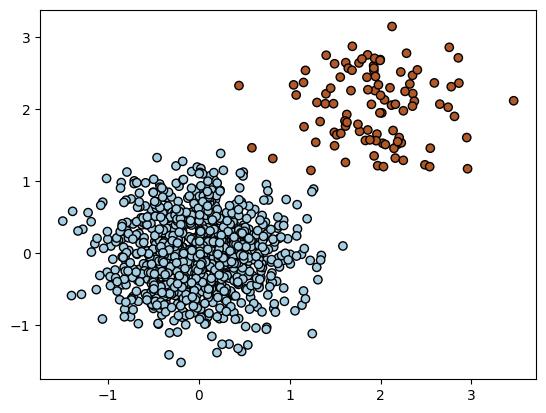

In [3]:
# plot the samples
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors="k")

#### Train model (linear SVM)

In [4]:
# Fit the model and get the separating hyperplane
clf = svm.SVC(kernel="linear", C=1)
clf.fit(X, y)

SVC(C=1, kernel='linear')

#### Visualize

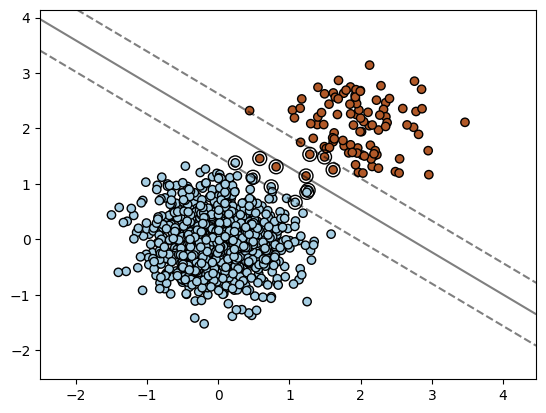

In [5]:
# plot the samples
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors="k")

# plot the decision function
ax = plt.gca()
disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)

# plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)


plt.show()

#### Load moon 2D samples

In [6]:
X, y = D.load_2d_moons(n_samples=100, noise=0.1)

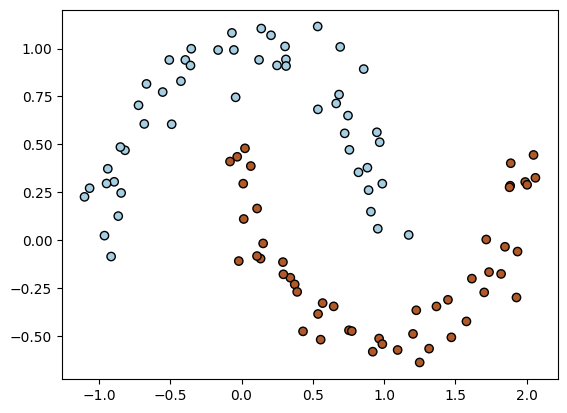

In [7]:
# plot the samples
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors="k")

In [8]:
# Fit the model and get the separating hyperplane
# kclf = svm.SVC(kernel="linear", C=1.0)
kclf = svm.SVC(kernel="rbf")
# kclf = svm.SVC(kernel="poly", degree=3)
kclf.fit(X, y)

SVC()

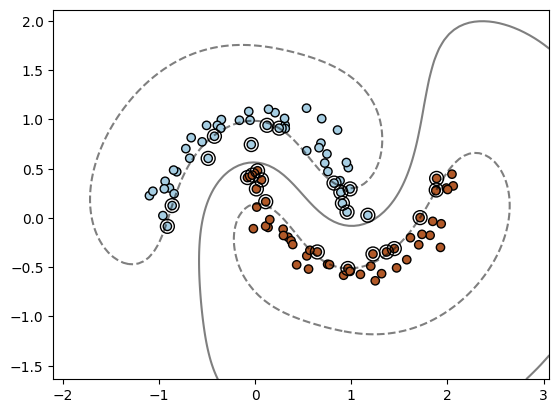

In [9]:
# plot the samples
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors="k")

# plot the decision functions for both classifiers
ax = plt.gca()
disp = DecisionBoundaryDisplay.from_estimator(
    kclf,
    X,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)

# plot support vectors
ax.scatter(
    kclf.support_vectors_[:, 0],
    kclf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)

plt.show()